## Motivating Gauss-Newton Method

Gauss-Newton Method is an *approximation* of Newton's Method for non-linear least squares. The following is the recurrence relation for Newton's Method that is calculated at each step. 

$$\begin{aligned}
x^{t+1} &= x^{t} - \nabla^{2}f(x^t)^{-1}\nabla f(x^t) \\
&= x^{t} - \boldsymbol{H}^{-1}\boldsymbol{g}
\end{aligned}$$

Some may be wondering why the second derivative appears in Newton's method in the first place. Recall that Newton's method is a root-finding algorithm. In a least-squares problem we aren't trying to determine the root of the objective function $f(x)$. Rather we are trying to determine the root of the gradient of the objective function i.e. $\nabla f(x) = 0$.

The problem with the above expression is that the Hessian is often computationally taxing to calculate. 

## Gauss-Newton Method

Gauss-Newton Method makes the following assumptions in order to *approximate* the Hessian and make it more manageable to calculate.

1. The Objective Function is a **sum of squares** 
    $$
f(x) = \sum_{i=1}^{m} r_{i}(x)^2 \\
$$

    The gradient and the hessian of sum of squares function can be expressed as follows.

    $$\begin{aligned}
\nabla f_{j}(x) &= 2\sum_{i=1}^{m} \frac{\partial r_{i}}{\partial x_j} \\
\nabla^{2} f_{jk}(x) &= 2\sum_{i=1}^{m} \left(\frac{\partial r_{i}}{\partial x_j}\frac{\partial r_{i}}{\partial x_k} + r_{i}\frac{\partial^2 r_{i}}{\partial x_j \partial x_k}\right) \\
\end{aligned}$$



2. **Drop the second derivative** term in the above expression for the Hessian

    In order to remove the second derivative term from the expression, we assume that the first derivative term dominates.

    $$
\left\lvert \frac{\partial r_{i}}{\partial x_j}\frac{\partial r_{i}}{\partial x_k}  \right\rvert >> \left\lvert r_{i}\frac{\partial^2 r_{i}}{\partial x_j \partial x_k}\right\rvert
$$

    Applying the above assumption, we can re-write the expression for the gradient and the hessian in matrix notation.

    $$\begin{align}
\boldsymbol{g} &= 2J^{T}_{r}r \\
\boldsymbol{H} &\approx 2J_{r}^{T}J_{r}
\end{align}$$

    Substituting the two expressions into the recurrence relation results in the following.

    $$\begin{aligned}
x^{t+1} &= x^{t} - \boldsymbol{H}^{-1}\boldsymbol{g} \\
&\approx x^{t} - \boldsymbol{H_{approx}}^{-1}\boldsymbol{g} \\
&= x^{t} - (2J_{r}^{T}J_{r})^{-1}(2J^{T}_{r}r(x^t)) \\
\end{aligned}$$

    $$
x^{t+1} = x^{t} - (J_{r}^{T}J_{r})^{-1}J^{T}_{r}r(x^t)
$$

    Note: $J_{r}^{T}J_{r}$ has to be invertible for above equation to hold. This condition implies that $J$ needs to have full column rank and that $\text{# of equation} \geq \text{# of variables}$ i.e. $m \geq n$.

We can notice here that the second term in the recurrence relation above is equivalent to the solution to the *linear least squares* problem $\|Ax-b\|^2$ where $b = r(x^t)$ and $A = J_{r}$. 

So, approximating the Hessian by the means outlined above is equivalent to solving a linear least squares problem at each step. We can visualize this process for the case where $x \in R$ (Explain)

![gauss-newton](https://i.stack.imgur.com/gdJ3v.gif)

### Convergence

Since Gauss-Newton Method is an approximation of Newton's method, convergence properties are similar if the assumptions made are well satisfied.
$$
\left\lvert r_{i}\frac{\partial^2 r_{i}}{\partial x_j \partial x_k}\right\rvert
$$

Local convergence to $x^k$ is quadratic much like Newton's method if the following two conditions are met. Otherwise, convergence is linear.

* $r_{i}(x^k)$ is small
* $\frac{\partial^2 r_{i}}{\partial x_j \partial x_k}$ is small i.e. $r_{i}(x^k)$ is nearly affine

So, due to these factors, the rate of convergence is dependent on the initial position and the nature of the function being operated on. These factors determine the effectiveness of the Hessian approximation.

Also, local convergence isn't guaranteed. Provide reasoning.

**Question for Christoph**
Would it be fair to assume that given these more "strict" convergence criterion, most of the benefits/downsides of Newton's Method still applies to Gauss-Newton Method? 

**Challenges of Gauss-Newton Method**
* large scale systems: exactly solving LLS at each step is too expensive.
* Problem dealing with Saddle points
.
.
.

Comparison with Stochastic Gradient Descent

Stochastic gradient descent is OK, but the iterates only converge in a statistical sense and not to high tolerance, so it is comparing apples to oranges.

References:
1. https://see.stanford.edu/materials/lsoeldsee263/07-ls-reg.pdf
2. http://www.seas.ucla.edu/~vandenbe/236C/lectures/gn.pdf
3. https://friedlander.io/19T2-406/notes/Non-linear_LS/
4. https://stats.stackexchange.com/questions/253632/why-is-newtons-method-not-widely-used-in-machine-learning
5. "Numerical optimization" Nocedal and Wright.
6. https://www.cs.ubc.ca/labs/lci/mlrg/slides/non_convex_optimization.pdf
7. https://stats.stackexchange.com/questions/327251/gradient-descent-on-non-convex-functions/328500#328500
8. https://en.wikipedia.org/wiki/Gauss%E2%80%93Newton_algorithm

https://math.stackexchange.com/questions/1840801/why-is-ata-invertible-if-a-has-independent-columns

In [2]:
include("../../../../math405.jl")

 Activating environment at `C:\Users\Devon\school\math405\Project.toml`


# Solving Non-Linear Least Squares Problems

How do we use the Gauss-Newton algorithm in practice?

Our Algorithm is defined as follows:

$$
a_{n+1} = a_{n} - (J^{T}J)^{-1}J^{T}r(a_{n})
$$

Suppose we are trying to fit a function to some exponential data. The goal is to minimize the sum of the squared residual between the data and the function we are trying to fit. That is, find a function of the form:
$$
y = f(x,a_1,a_2,a_3,\dots,a_m) = f(x,a) \\
a = [a_1, \dots, a_m]^T
$$
such that the sum of squared residuals (errors) is minimized.

The residual we are trying to minimize can be written in vector form:
$$
r = 
\begin{pmatrix}
  r_1 \\ \vdots \\ r_m 
\end{pmatrix}
=
\begin{pmatrix}
  y_1 - f_1(a) \\ \vdots \\ y_m - f_m(a)
\end{pmatrix}
=
\begin{pmatrix}
  y_1 \\ \vdots \\ y_m
\end{pmatrix}
-
\begin{pmatrix}
  f_1(a) \\ \vdots \\ f_m(a)
\end{pmatrix}
=
y - f(a)
$$

### Example 1: Fitting Exponential Data

Lets start by generating exponential data from the function:
$$
f(x) = 2e^{0.2x} + 4
$$

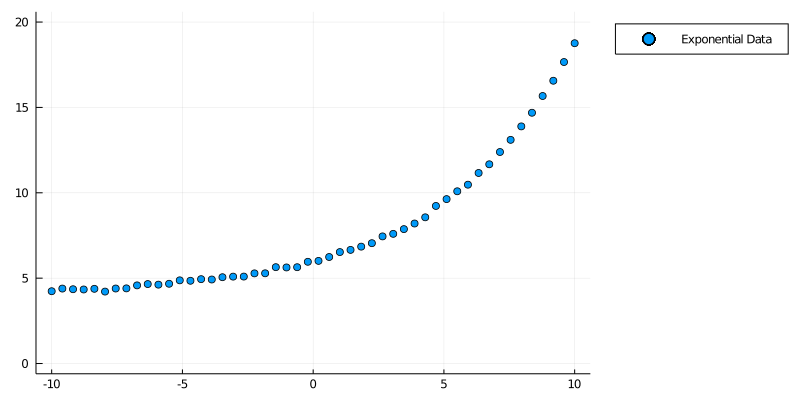

In [5]:
#Function to Fit 
r_f5(x) = 2 * exp(0.2 * x) + 4

#Create N Evenly spaced Data points
N = 50
bot_range = -10; top_range = 10
step = (top_range - bot_range) / (N-1)
X = collect(bot_range:step:top_range) ;
Y = r_f5.(X) + 0.1 .* randn(size(X,1));

scatter(X, Y, lw=3, label="Exponential Data", size=(800,400), ylims = [0,20], xlims = [-10,10], legend = :outertopright)

We use an exponential model to attemp to fit this data

$$
\begin{align*}
f(x,a_1,a_2,a_3) & = a_1e^{a_2x} + a_3 \\
f(x,a) & = a_1e^{a_2x} + a_3
\end{align*}
$$

As stated above we are trying to find $a$ s.t. the sum of squared residuals is minimized. In other words, we start with an intial guess for our paramaters $a_1,a_2,a_3$ and iterate until $a_{step} = a_{n+1} - a_n$ is less than some tolerance level.

But how do we find $a_{step}$?

$$
a_{step} = a_{n+1} - a_n = - (J^{T}J)^{-1}J^{T}r(a_{n}) = - (J^{T}J)^{-1}J^{T}(y - f(a_n)) = (J^{T}J)^{-1}J^{T}(f(a_n) - y)
$$

To find $a_{step}$ we solve an approximation of a linear system

$$
(J^{T}J)a_{step} = J^{T}r(a_{n})
$$

and our algorithm becomes:

$$
a_{n+1} = a_n - a_{step}
$$

In [3]:
using ForwardDiff

#Define the model function
f5(x,a) = a[1] .* exp.(a[2] .* x) .+ a[3]


#Define function to compute Jacobian

function Jac(x::Vector,a::Vector)
    # computes Jacobian by setting rows of a matrix J to the gradient of f at x_i for given a
    
    #create Matrix of appropriate size
    J = zeros(size(x,1),size(a,1)) 
    
    #loop through values of vector X
    for i in (1:size(x,1))
        
        #create local version of function we are trying to fit evaluated at x_i
        p = a -> a[1]*exp(a[2]*x[i]) + a[3]
        
        #Set row i of Jacobian matrix to the transpose of the gradient of our function evaluated at x_i for given a
        J[i,:] = transpose(ForwardDiff.gradient(p, a))
    end
    
    #Return Jacobian Matrix
    return J
end

Jac (generic function with 1 method)

In [4]:
r(x,a) = f5(x,a) - Y                     # Vector of Residuals
A(x,a) = transpose(Jac(x,a))*Jac(x,a)    # Approximation to Linear Least Squares Matrix
b(x,a) = transpose(Jac(x,a))*r(x,a)      # Approximation to Linear Least Squares Vector
a_step5(x,a) = A(x,a) \ b(x,a)           # step function is solution of Linear Least Squares Approximation

a_step5 (generic function with 1 method)

In [6]:
#Set Iteration Count, Initial Guess, and tolerance level
k = 0
a = [[0.0,0.0,0.0],[1.0,1.0,1.0]]
tolerance5 = 1e-16
alpha = 0.1
E1 = []
K1 = []
while ((norm(abs.(a[2] - a[1])) > tolerance5))
       a[1] = a[2]
       a[2] = a[1] - alpha*a_step5(X,a[1])
       k = k+1
       push!(K1,k)
       push!(E1, norm(r(X,a[2])))
    
       if k > 1000
           break
       end
   end
@show k
@show a[2];

k = 410
a[2] = [1.9765776166708255, 0.20147959880639807, 4.015393889548379]


### Using LsqFit

Alteratively we can use the LsqFit package to determine the parameters for our model. Note however, that LsqFit uses only the Levenberg-Marquardt algorithm for non-linear fitting.

In [7]:
using LsqFit
model(x, p) = p[1] .* exp.(x .* p[2]) .+ p[3]
xdata = X;
ydata = Y;
p0 = [1.0, 1.0, 1.0];
fit = curve_fit(model, xdata, ydata, p0);
residual = fit.resid;
@show c = coef(fit);

c = coef(fit) = [1.9765776099631178, 0.2014795991588878, 4.015393894818897]


##### Plotting the model function using coeffiecients found with GN method and LsqFit package

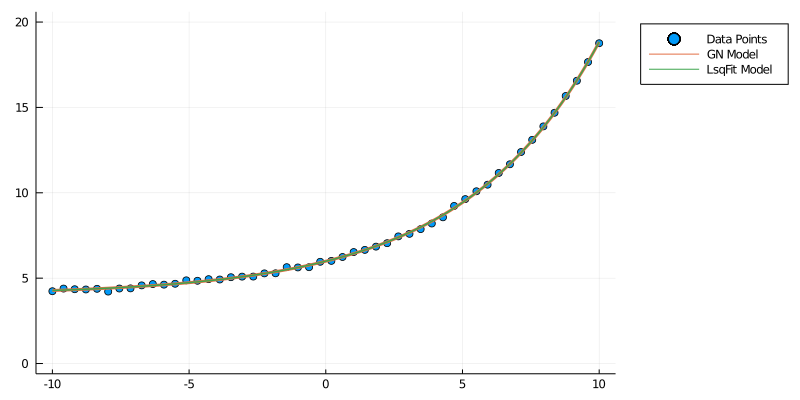

In [8]:
M = 1000
gridstep = (20) / (M-1)
Xgrid = collect(-10:gridstep:10) ;


scatter(X, Y, lw=3, label="Data Points", size=(800,400), ylims = [0,20], xlims = [-10,10], legend = :outertopright)
plot!(Xgrid,f5(Xgrid,a[2]), lw=3, label="GN Model", size=(800,400), ylims = [0,20], xlims = [-10,10], legend = :outertopright)
plot!(Xgrid, model(Xgrid,coef(fit)), lw=1.5, label="LsqFit Model", size=(800,400), ylims = [0,20], xlims = [-10,10], legend = :outertopright)

##### Sum of squared errors at each iteration

We can show the sum of the square of reiduals at each iteration and compare our final result with that produced by LsqFit

In [9]:
pretty_table( [[k for k in K1] [e for e in E1]], 
               ["k", "|r(a_n)|^{2}"], 
              formatters = (v, i, j) -> (@sprintf("%1.20f", v))  )

┌─────────────────────────┬────────────────────────────┐
│                       k │               |r(a_n)|^{2} │
├─────────────────────────┼────────────────────────────┤
│  1.00000000000000000000 │ 26510.57230958380750962533 │
│  2.00000000000000000000 │ 23862.39893361066424404271 │
│  3.00000000000000000000 │ 21479.04035322404160979204 │
│  4.00000000000000000000 │ 19334.01480929290482890792 │
│  5.00000000000000000000 │ 17403.48868820402276469395 │
│  6.00000000000000000000 │ 15666.01170408748839690816 │
│  7.00000000000000000000 │ 14102.27856249717660830356 │
│  8.00000000000000000000 │ 12694.91445737299363827333 │
│  9.00000000000000000000 │ 11428.28201792702748207375 │
│ 10.00000000000000000000 │ 10288.30756043174551450647 │
│ 11.00000000000000000000 │  9262.32471438879656489007 │
│ 12.00000000000000000000 │  8338.93368560920134768821 │
│ 13.00000000000000000000 │  7507.87459248304912762251 │
│ 14.00000000000000000000 │  6759.91346809013248275733 │
│ 15.00000000000000000000 │  60

In [10]:
@show sum(residual.^2);
@show E1[end];

sum(residual .^ 2) = 0.29681734415574895
E1[end] = 0.5448094567422171


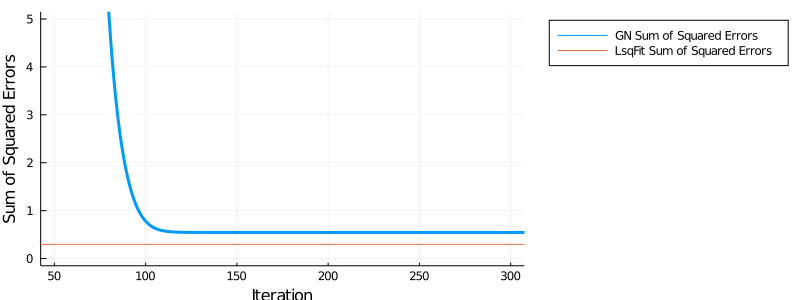

In [11]:
L5 = collect(1:1:size(K1,1))
plot(L5, E1, lw=3, label="GN Sum of Squared Errors", xlab = "Iteration", ylab = "Sum of Squared Errors",size=(800,300), ylims = [0,5], xlims = [50,300], legend = :outertopright)
plot!(L5, ones(size(L5,1),1)*sum(residual.^2), lw=1, label = "LsqFit Sum of Squared Errors", xlab = "Iteration", ylab = "Sum of Squared Errors",size=(800,300), ylims = [0,5], xlims = [50,300], legend = :outertopright)

### Example 2: Fitting Sinusoidal Data

We can fit the data using multiple function models and compare the results.

How does our model compare against a linear model?

Sart by generating data again:

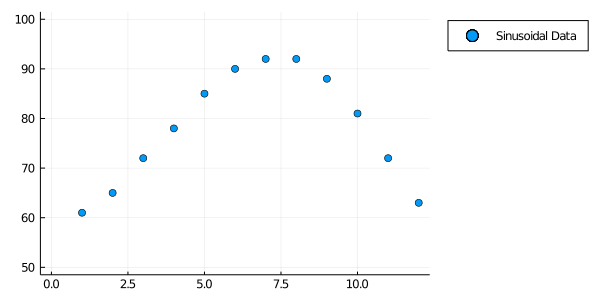

In [12]:
# A sinusoidal model
f6(x,a) = a[1] .* sin.(a[2] .* x .+ a[3]) .+ a[4]

#Given Data Points
X2 = [1,2,3,4,5,6,7,8,9,10,11,12];
Y2 = [61,65,72,78,85,90,92,92,88,81,72,63];

scatter(X2,Y2, lw=1.5, label="Sinusoidal Data", size=(600,300), ylims = [50,100], xlims = [0,12], legend = :outertopright)

Run through same process as above using a sinusoidal model

In [13]:
#Helper Functions
function Jac2(x::Vector,a::Vector)
    # computes Jacobian by setting rows of a matrix J to the gradient of f at x_i for given a
    
    #create Matrix of appropriate size
    J = zeros(size(x,1),size(a,1)) 
    
    #loop through values of X vector
    for i in (1:size(x,1))
        
        #create local version of function we are trying to fit evaluated at x_i
        p = a -> a[1] * sin(a[2] * x[i] + a[3]) + a[4]
        
        #Set row of matrix corresponding to current X_i to the transpose of the gradient of the local fn evaluated at x_i
        J[i,:] = transpose(ForwardDiff.gradient(p, a))
    end
    
    #Return Jacobian Matrix
    return J
end


r2(x,a) = f6(x,a) - Y2  # Vector of Residuals
A2(x,a) = transpose(Jac2(x,a))*Jac2(x,a)
b2(x,a) = transpose(Jac2(x,a))*r2(x,a)
a_step6(x,a) = A2(x,a) \ b2(x,a)

#Set Iteration Count, Initial Guess, and tolerance level
k = 0
a2 = [[0.0,0.0,0.0,0.0],[1.0,1.0,1.0,1.0]]
tolerance5 = 1e-16
alpha = 0.1
E2 = []

while ((norm(abs.(a2[2] - a2[1])) > tolerance5))
       a2[1] = a2[2]
       a2[2] = a2[1] - alpha*a_step6(X2,a2[1])
       k = k+1
       push!(E2, norm(r2(X2,a2[2])))
   
       if k > 10000
           break
       end
   end
@show k;
@show a2[2];

k = 340
a2[2] = [16.639945553698848, 0.4632781156624956, 4.569103880643862, 76.19086103483306]


Try to fit the sinusoidal Data with a linear model

In [14]:
# Using a linear fit model 

f7(x,a) = a[1] .* x .+ a[2]

#Given Data Points
X3 = [1,2,3,4,5,6,7,8,9,10,11,12]
Y3 = [61,65,72,78,85,90,92,92,88,81,72,63]

#Helper Functions
function Jac3(x::Vector,a::Vector)
    # computes Jacobian by setting rows of a matrix J to the gradient of f at x_i for given a
    
    #create Matrix of appropriate size
    J = zeros(size(x,1),size(a,1)) 
    
    #loop through values of X vector
    for i in (1:size(x,1))
        
        #create local version of function we are trying to fit evaluated at x_i
        p = a -> a[1] * x[i] + a[2]
        
        #Set row of matrix corresponding to current X_i to the transpose of the gradient of the local fn evaluated at x_i
        J[i,:] = transpose(ForwardDiff.gradient(p, a))
    end
    
    #Return Jacobian Matrix
    return J
end


r3(x,a) = f7(x,a) - Y2  # Vector of Residuals
A3(x,a) = transpose(Jac3(x,a))*Jac3(x,a)
b3(x,a) = transpose(Jac3(x,a))*r3(x,a)
a_step7(x,a) = A3(x,a) \ b3(x,a)

#Set Iteration Count, Initial Guess, and tolerance level
k = 0
a3 = [[0.0,0.0],[1.0,1.0]]
tolerance5 = 1e-16
alpha = 0.1
E3 = []

while ((norm(abs.(a3[2] - a3[1])) > tolerance5))
       a3[1] = a3[2]
       a3[2] = a3[1] - alpha*a_step7(X3,a3[1])
       k = k+1
       push!(E3, norm(r3(X3,a3[2])))
       if k > 10000
           break
       end
   end
@show k;
@show a3[2];

k = 333
a3[2] = [0.7727272727272727, 73.22727272727266]


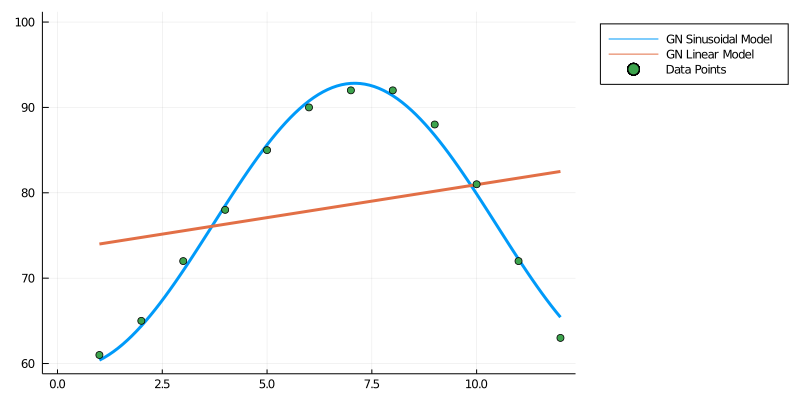

In [15]:
N = 100
bot_range = 1; top_range = 12
step = (top_range - bot_range) / (N-1)
L = collect(bot_range:step:top_range)
R2 = f6(L,a2[2])
R3 = f7(L,a3[2])

plot(L, R2, lw=3, label="GN Sinusoidal Model", size=(400,200), ylims = [60,100], xlims = [0,12], legend = :outertopright)
plot!(L, R3, lw=3, label="GN Linear Model", size=(400,200), ylims = [60,100], xlims = [0,12], legend = :outertopright)
scatter!(X2,Y2, lw=1.5, label="Data Points", size=(800,400), ylims = [60,100], xlims = [0,12], legend = :outertopright)

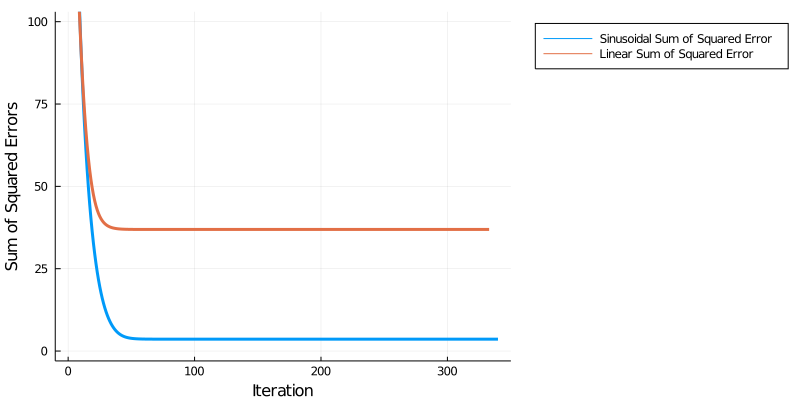

In [16]:
L4 = collect(1:1:333)
L3 = collect(1:1:340)

plot(L3, E2, lw=3, label="Sinusoidal Sum of Squared Error", xlab = "Iteration", ylab = "Sum of Squared Errors",size=(800,400), ylims = [0,100], xlims = [0,340], legend = :outertopright)
plot!(L4, E3, lw=3, label="Linear Sum of Squared Error",xlab = "Iteration", ylab = "Sum of Squared Errors", size=(800,400), ylims = [0,100], xlims = [0,340], legend = :outertopright)

Convergence is not guaranteed with G-N method or Non-Linear Least Squares in General. In this case a line search can be used to take the optimal step at each iteration and improve convergence.

$$
a_{n+1} = a_n + \gamma_{n}a_{step}
$$

Where $\gamma_n$ determines the step size at the $n^{th}$ iteration